In [5]:
pip install kaggle

In [7]:
# configuring the path of Kaggle.json file
!mkdir "%USERPROFILE%\.kaggle"
!copy kaggle.json "%USERPROFILE%\.kaggle\"
!icacls "%USERPROFILE%\.kaggle\kaggle.json" /inheritance:r /grant:r "%USERNAME%:RW"

        1 file(s) copied.
processed file: C:\Users\hp\.kaggle\kaggle.json
Successfully processed 1 files; Failed processing 0 files


### Why Did You Do These Steps?

1. **Installing the `kaggle` Package (`!pip install kaggle`)**  
   - The `kaggle` package is a Python library that allows you to interact with Kaggle’s API. You need it to download datasets, submit competition entries, or list available datasets directly from your Jupyter Notebook.
   - In your output, `kaggle-1.7.4.5-py3-none-any.whl` was downloaded and installed, along with its dependencies (like `bleach`, `certifi`, `six`, etc.). This ensures the Kaggle API client is ready to use in your environment.

2. **Setting Up the `kaggle.json` File**  
   - The `kaggle.json` file contains your Kaggle API credentials (an API token), which authenticates your requests to Kaggle’s servers. Without this, you can’t use the Kaggle API to download datasets or interact with Kaggle programmatically.
   - The steps you followed (`mkdir`, `copy`, and `icacls` on Windows) did the following:
     - Created a `.kaggle` directory in your user profile (`C:\Users\hp\.kaggle`).
     - Copied the `kaggle.json` file into that directory.
     - Set permissions to restrict access to the file (only your user account "hp" can read/write it), which is a security measure to protect your API credentials.
   - Kaggle’s API expects the `kaggle.json` file to be in this specific location (`~/.kaggle/` on Unix or `%USERPROFILE%\.kaggle\` on Windows) to authenticate your requests automatically.

3. **Why This Is Necessary for our Project**  
   - Your dataset, which contains 1.6 million tweets for sentiment analysis, is hosted on Kaggle. To download it directly into your Jupyter Notebook environment (without manually downloading and uploading the file), you need to use the Kaggle API.
   - By setting up the API credentials and installing the `kaggle` package, you can now run a command like `!kaggle datasets download -d username/dataset-name` to download the dataset programmatically. For example, if your dataset is something like `kazanova/sentiment140`, you’d run:
     ```bash
     !kaggle datasets download -d kazanova/sentiment140
     ```

     This would download a ZIP file containing the dataset, which you can then unzip and load into your notebook for analysis.

In [11]:
#api to fetch the dataset from kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
#our dataset file is already downloaded by us, so by this command it Checks if the sentiment140.zip file in your current working directory is valid and contains the data you need
!dir sentiment140.zip

 Volume in drive C is Windows
 Volume Serial Number is 8257-D5BA

 Directory of C:\Users\hp\Desktop\python\Twitter Sentiment Analysis using NLP

09/21/2019  02:37 AM        84,855,679 sentiment140.zip
               1 File(s)     84,855,679 bytes
               0 Dir(s)  384,105,156,608 bytes free


In [3]:
#extracting the csv file from the zipfile
from zipfile import ZipFile
dataset = "C:/Users/hp/Desktop/python/Twitter Sentiment Analysis using NLP/sentiment140.zip"

with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print("dataset is extracted")

dataset is extracted


IN THE ABOVE STEP WE ARE IMPORTING THE LIBRARY  zipfile AND THEN SPECIFYING THE PATH OF THE FILE THAT WE WANT TO EXTRACT. 
THEN WITH THE HELP OF ZipFile function , I'am reading the dataset file by creating a variable called zip and then extracting all the components of the file. 

# IMPORTING DEPENDENCIES 

In [7]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### What Does This Code Do?
**NLTK (Natural Language Toolkit)**: NLTK is a popular Python library for working with human language data (text), widely used in NLP tasks like sentiment analysis.
- nltk.corpus: This module in NLTK provides access to various linguistic resources, such as corpora (large collections of text) and word lists.
- **stopwords**: This is a specific resource in nltk.corpus that contains a list of common words (e.g., "the", "is", "and", "to") that are often removed from text during preprocessing in NLP tasks. These words are called "stop words" because they typically don’t carry significant meaning for tasks like sentiment analysis and can add noise to your model.
- By importing stopwords, you’re preparing to use this list to filter out these common words from the tweets in your Sentiment140 dataset, which is a standard preprocessing step in NLP.
- **PorterStemmer**: This is a stemming algorithm that reduces words to their root form (e.g., "running" → "run", "better" → "better"). Stemming simplifies the text, which can improve the performance of your sentiment analysis model by reducing the vocabulary size.
- **TfidfVectorizer**: This imports the TfidfVectorizer class from scikit-learn, which converts text data into numerical features using the TF-IDF (Term Frequency-Inverse Document Frequency) method. TF-IDF gives higher weight to words that are frequent in a specific document (tweet) but rare across the entire dataset, making it useful for identifying important words.

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

### DATA PROCESSING

In [13]:
#LOADING THE DATA FROM CSV FILE TO PANDAS DATAFRAME(STRUCTURED DATA)
column_names = ["target", "id", "date", "query", "user", "text"]
twitter_data = pd.read_csv("C:/Users/hp/Desktop/python/Twitter Sentiment Analysis using NLP/training.1600000.processed.noemoticon.csv" ,names = column_names,encoding = "ISO-8859-1")

- we are adding column names to the dataset, if not it will take the first row as column names.
- The Sentiment140 dataset uses ISO-8859-1 encoding (also known as Latin-1). This encoding is necessary because the dataset contains special characters (e.g., in tweets) that might not be handled correctly with the default UTF-8 encoding, which could lead to a UnicodeDecodeError.

In [17]:
twitter_data.shape

(1600000, 6)

In [18]:
twitter_data.head()

,target,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [22]:
twitter_data.isnull().sum()

target    0
id        0
date      0
query     0
user      0
text      0
dtype: int64

In [24]:
#checking distribution of the target column
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

so there are 8 lakh tweets with the label 0 and 8 lakh tweets with the label 4

#### Convert the target "4" to "1"

In [28]:
twitter_data.replace({'target':{4:1}},inplace = True)

In [30]:
#checking distribution of the target column
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

0 --->negative tweet

1 --->positive tweet

#### Stemming


In [34]:
ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

- This removes all characters that are not letters (a-z, A-Z).It replaces punctuation, numbers, and symbols with a space.
- Converts the entire text to lowercase to ensure uniformity.
- Splits the sentence into individual words (tokens).
- This is a list comprehension:
    * It loops over each word in the list.
    * Applies stemming to each word using port_stem.stem(word).
    * Ignores stopwords like "is", "the", "and", etc. (These are common words that don’t add sentiment value.)

In [37]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming)

In [38]:
twitter_data.head()

,target,id,date,query,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [39]:
print(twitter_data['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [40]:
print(twitter_data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


### SEPERATING THE DATA AND LABEL

In [42]:
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values

In [43]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [44]:
print(Y)

[0 0 0 ... 1 1 1]


### SPLITTING THE DATA TO TRAIN AND TEST 

In [52]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y ,random_state = 2)

- When you're dealing with classification problems (like sentiment analysis: positive, negative, neutral), your dataset might have imbalanced classes.

- Without stratify, train_test_split() might randomly pick more of one class into the training or test set, leading to biased results.

In [54]:
print(X.shape,X_train.shape,X_test.shape)

(1600000,) (1280000,) (320000,)


In [56]:
#converting textual data into numerical data

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [57]:
print(X_train)

  (0, 436713)	0.27259876264838384
  (0, 354543)	0.3588091611460021
  (0, 185193)	0.5277679060576009
  (0, 109306)	0.3753708587402299
  (0, 235045)	0.41996827700291095
  (0, 443066)	0.4484755317023172
  (1, 160636)	1.0
  (2, 109306)	0.4591176413728317
  (2, 124484)	0.1892155960801415
  (2, 407301)	0.18709338684973031
  (2, 129411)	0.29074192727957143
  (2, 406399)	0.32105459490875526
  (2, 433560)	0.3296595898028565
  (2, 77929)	0.31284080750346344
  (2, 443430)	0.3348599670252845
  (2, 266729)	0.24123230668976975
  (2, 409143)	0.15169282335109835
  (2, 178061)	0.1619010109445149
  (2, 150715)	0.18803850583207948
  (2, 132311)	0.2028971570399794
  (2, 288470)	0.16786949597862733
  (3, 406399)	0.29029991238662284
  (3, 158711)	0.4456939372299574
  (3, 151770)	0.278559647704793
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 318303)	0.21254698865277744
  (1279996, 434014)	0.27189450523324465
  (1279996, 390130)	0.2206474219107611
  (1279996, 373144)	0.35212500999832036
  (1279996, 23807

In [58]:
print(X_test)

  (0, 15110)	0.1719352837797837
  (0, 31168)	0.1624772418052177
  (0, 67828)	0.26800375270827315
  (0, 106069)	0.36555450010904555
  (0, 132364)	0.255254889555786
  (0, 138164)	0.23688292264071406
  (0, 171378)	0.2805816206356074
  (0, 271016)	0.45356623916588285
  (0, 279082)	0.17825180109103442
  (0, 388348)	0.2198507607206174
  (0, 398906)	0.34910438732642673
  (0, 409143)	0.3143047059807971
  (0, 420984)	0.17915624523539805
  (1, 6463)	0.30733520460524466
  (1, 15110)	0.211037449588008
  (1, 145393)	0.575262969264869
  (1, 217562)	0.40288153995289894
  (1, 256777)	0.28751585696559306
  (1, 348135)	0.4739279595416274
  (1, 366203)	0.24595562404108307
  (2, 22532)	0.3532582957477176
  (2, 34401)	0.37916255084357414
  (2, 89448)	0.36340369428387626
  (2, 183312)	0.5892069252021465
  (2, 256834)	0.2564939661498776
  :	:
  (319994, 443794)	0.2782185641032538
  (319995, 107868)	0.33399349737546963
  (319995, 109379)	0.3020896484890833
  (319995, 155493)	0.2770682832971669
  (319995, 2133

### TRAINING THE MACHINE LEARNING MODEL

In [59]:
# LOGISTIC REGRESSION

model = LogisticRegression(max_iter = 1000)

In [60]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

#### MODEL EVALUATION

In [67]:
X_train_prediction =  model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [69]:
print("accuracy on the training data is :", training_data_accuracy)

accuracy on the training data is : 0.79871953125


In [73]:
X_test_prediction =  model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [75]:
print("accuracy on the testing data is :", testing_data_accuracy)

accuracy on the testing data is : 0.77668125


#### MODEL ACCURACY: 77.66%

In [78]:
# --- Testing a Sample Tweet ---
sample_tweet = "I love the new features of this app, it's amazing!"
# Preprocess the sample tweet
stemmed_sample = stemming(sample_tweet)
# Convert to numerical data using the same vectorizer
sample_vector = vectorizer.transform([stemmed_sample])
# Predict sentiment
prediction = model.predict(sample_vector)

# Output the result
sentiment = "Positive" if prediction[0] == 1 else "Negative"
print(f"Sample Tweet: {sample_tweet}")
print(f"Predicted Sentiment: {sentiment}")

Sample Tweet: I love the new features of this app, it's amazing!
Predicted Sentiment: Positive


### Visualization

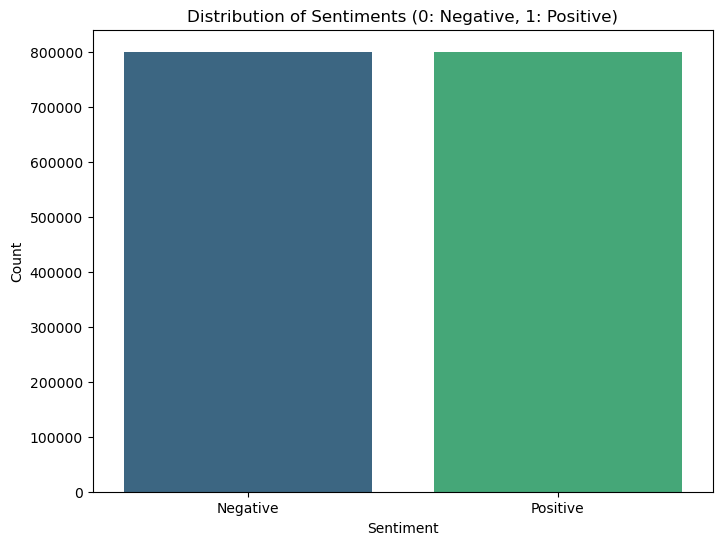

In [87]:
# Distribution of Sentiments
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='target', hue='target', data=twitter_data, palette='viridis', legend=False)
plt.title('Distribution of Sentiments (0: Negative, 1: Positive)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.savefig('sentiment_distribution.png')

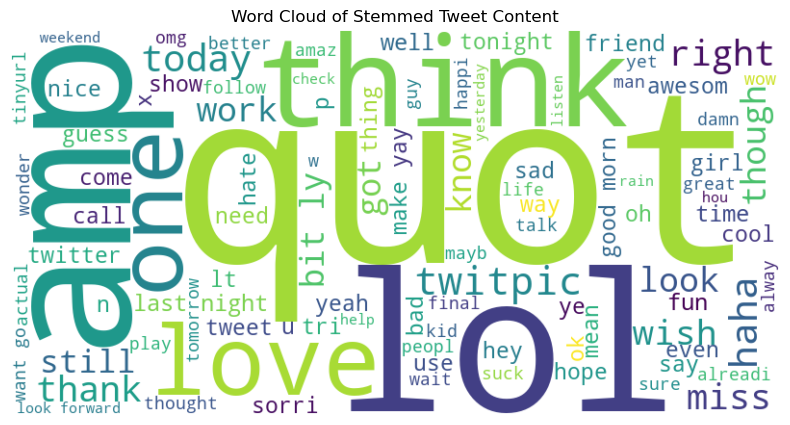

In [97]:
# 2. Word Cloud for Stemmed Content 
!pip install wordcloud
from wordcloud import WordCloud
all_stemmed_content = ' '.join(twitter_data['stemmed_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_stemmed_content)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Stemmed Tweet Content')
plt.savefig('wordcloud.png')